# 3 занятие: Массивы в библиотеке Numpy
## Попов Артём, кафедра ММП ВМК МГУ

О чём можно узнать из этого ноутбука:

* операции при работе с массивами
* многомерные массивы
* изменение размеров массивов
* broadcasting
* продвинутая индексация
* view и копирование

In [1]:
# from numpy import * -- НЕ ДЕЛАЙТЕ ТАК
import numpy as np

## Основные операции

Создание массивов (размер передаётся с помощью кортежа):

In [2]:
np.zeros((5, 7))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [3]:
np.ones((1, 3))

array([[ 1.,  1.,  1.]])

In [4]:
np.empty((3, 4))

array([[  6.94625564e-310,   2.12289336e-316,   6.94625584e-310,
          1.27319747e-313],
       [  1.27319747e-313,   1.27319747e-313,   2.96439388e-323,
          1.90979621e-313],
       [  0.00000000e+000,   2.75859453e-313,   6.94625581e-310,
          6.94614102e-310]])

Создание массива из Python-объекта

In [5]:
x = np.array([1, 2, 3])
(x)

array([1, 2, 3])

Shape массива:

In [6]:
x.shape

(3,)

In [7]:
x = np.array([[1], [2]])
print(x)
print(x.shape)

[[1]
 [2]]
(2, 1)


In [8]:
x = np.arange(10)
y = np.arange(15, 5, -1)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[15 14 13 12 11 10  9  8  7  6]


Поэлементные операции:

In [9]:
x + y

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [10]:
x * y

array([ 0, 14, 26, 36, 44, 50, 54, 56, 56, 54])

In [11]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

Нахождение максимума и аргмаксимума:

In [12]:
np.amax(x * y)

56

In [13]:
np.argmax(x * y)

7

Поэлементные сравнения:

In [14]:
x > 5

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

In [15]:
np.all(x > 5)

False

In [16]:
np.any(x > 5)

True

## Типы и преобразование типов

In [17]:
x = np.arange(15)
x.dtype

dtype('int64')

In [18]:
y = np.array([1.5, 2.5])
y.dtype

dtype('float64')

In [19]:
x = x.astype(np.float64)
x.dtype

dtype('float64')

## Изменение размера массивов

NumPy массивы всегда лежат в памяти последовательно, одним куском. Поэтому у массива можно изменять размер практически бесплатно.

In [20]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
x.shape

(2, 3)

Вытянуть в вектор:

In [22]:
x = x.ravel()
x

array([1, 2, 3, 4, 5, 6])

Два распространённых способа упорядочить многомерный массив:
* C-order, **по умолчанию в NumPy**. Быстрее всего изменяется последний индекс. Для матриц — сначала идём по столбцам.
* Fortran-order (F-order). Быстрее всего изменяется первый индекс. Для матриц — сначала идём по строкам.

In [23]:
c_order = x.reshape(2, 3)
c_order

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
f_order = x.reshape(2, 3, order='F')
f_order

array([[1, 3, 5],
       [2, 4, 6]])

Два способа добавить фиктивную размерность в массив:

In [25]:
x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [26]:
x.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

## Многомерные массивы

In [27]:
x = np.array([[1, 2], [2, 1], [2, 3]])
x

array([[1, 2],
       [2, 1],
       [2, 3]])

Транспонирование:

In [28]:
x.T

array([[1, 2, 2],
       [2, 1, 3]])

Матричное умножение:

In [29]:
y = np.array([[0, 1, 0], [1, 0, 1]])

In [30]:
x.dot(y)

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

In [31]:
res = np.dot(x, y)
res

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

Максимум в каждом столбцe (первая размерность, axis=0):

In [32]:
np.amax(res, axis=0)

array([3, 2, 3])

Как легко запомнить, как работает axis:
* после применения функции получится массив, в котором будет отсутствовать размерность указанная в axis, но остальные размерности будут иметь такие же значения

In [33]:
a = np.ones((3, 5))
a

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [34]:
res = a.sum(axis=0)
print(res.shape)
print(res)

(5,)
[ 3.  3.  3.  3.  3.]


In [35]:
res = a.sum(axis=1)
print(res.shape)
print(res)

(3,)
[ 5.  5.  5.]


Поставить массивы сбоку друг от друга:

In [36]:
x = np.array([[1, 2], [2, 1], [2, 3]])
np.hstack((x, x))

array([[1, 2, 1, 2],
       [2, 1, 2, 1],
       [2, 3, 2, 3]])

Сверху друг на друга:

In [37]:
np.vstack((x, x))

array([[1, 2],
       [2, 1],
       [2, 3],
       [1, 2],
       [2, 1],
       [2, 3]])

Использование масок:

In [38]:
mask = x == 1
mask

array([[ True, False],
       [False,  True],
       [False, False]], dtype=bool)

In [39]:
x[mask] = -1
x

array([[-1,  2],
       [ 2, -1],
       [ 2,  3]])

Для макси с несколькими условиями использовать логические операнды (например, & или |)

## Broadcasting

Подробное описание: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [40]:
x = np.arange(10)
y = np.arange(5)

Можно складывать только массивы одного размера:

In [41]:
x + y

ValueError: operands could not be broadcast together with shapes (10,) (5,) 

Или почти одного...

In [42]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [43]:
x[:, np.newaxis] + y[np.newaxis, :]

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]])

Если два массива имеют размерности (a_1, a_2 .. a_n) и (b_1, b_2 .. b_n) соответственно, то между ними можно проводить почленные операции, если для каждого i выполнено одно из трёх условий:
* либо a_i = b_i
* либо a_i = 1
* либо b_i = 1

## Сложная индексация

In [44]:
x = np.arange(20)
x.shape = (4, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Можно делать slicing как для списков. По каждой размерности может быть свой slice.

Важное отличие от питоновских списков: при slicing возвращается **view**, а не копия! Это позволяет присваивать значения подматрицам.

In [45]:
x[0:3, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14]])

x[0] эквивалентно x[0, :], то есть недостающие индексы заменяются на :

Есть и более продвинутая индексация. По каждой размерности подаются массивы одинаковых размеров, элементы которых соответствуют индексам каждой размерности. Тогда, на выходе будет массив размера этих массивов, элементы которого будут соответствовать элементам исходного массива, взятых в точках, соответствующих поданным массивам.

In [46]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
X[[0, 1], [1, 2]]

array([2, 6])

In [48]:
X[[0, 0], [1, 0]]

array([2, 1])

## View и копирование

In [49]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
y = x
y.shape = (2, 5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

View ссылается на те же данные, но позволяет задать другие размерности массива.

In [51]:
x = np.arange(10)
v = x.view()
v.shape = (2, 5)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
v[0, 0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

Если нужно получить копию массива, чтобы не портить переданные данные, пользуйтесь функцией copy()

In [53]:
x = np.arange(10)
y = x.copy()
y[:] = 0
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Разные задачи

### 1)

Дана матрица размерности $N \times K$, $N$ - число объектов, $K$ - число признаков.
Подсчитать выборочное среднее и ковариационную матрицу без использования
функций mean и cov

$$ E[X]={\frac {1}{n}}\sum \limits _{i=1}^{n}x_{i} $$

$$ {\mathrm  {cov}}(X_{{(n)}},Y_{{(n)}})={\frac  1n}\sum _{{t=1}}^{n}\left(X_{t}-\overline {X}\right)\left(Y_{t}-\overline {Y}\right),$$

In [54]:
X = np.random.rand(100, 5)
N = X.shape[0]
mean = np.sum(X, axis=0) / N
mean

array([ 0.49934842,  0.5102205 ,  0.52939591,  0.51816199,  0.49208309])

In [55]:
np.mean(X, axis=0)

array([ 0.49934842,  0.5102205 ,  0.52939591,  0.51816199,  0.49208309])

In [56]:
Y = X - mean[np.newaxis, :]  # broadcasting
Y.shape

(100, 5)

In [57]:
cov = Y.T.dot(Y) / (N-1)
cov

array([[ 0.08469767,  0.00296189,  0.00364758,  0.01649393, -0.00024072],
       [ 0.00296189,  0.08999397, -0.00329246,  0.01617918,  0.02143525],
       [ 0.00364758, -0.00329246,  0.09227386,  0.0125081 ,  0.01516279],
       [ 0.01649393,  0.01617918,  0.0125081 ,  0.07141613,  0.01357063],
       [-0.00024072,  0.02143525,  0.01516279,  0.01357063,  0.09477709]])

In [58]:
np.cov(X.T)

array([[ 0.08469767,  0.00296189,  0.00364758,  0.01649393, -0.00024072],
       [ 0.00296189,  0.08999397, -0.00329246,  0.01617918,  0.02143525],
       [ 0.00364758, -0.00329246,  0.09227386,  0.0125081 ,  0.01516279],
       [ 0.01649393,  0.01617918,  0.0125081 ,  0.07141613,  0.01357063],
       [-0.00024072,  0.02143525,  0.01516279,  0.01357063,  0.09477709]])

### 2)

Даны два вектора одинаковой длины: a и b. Оставить в этих векторах только те элементы, которые соответствуют позициям ненулевых элементов в обоих векторах.

In [59]:
a = np.array([0, 1, 0, 2, 1])
b = np.array([1, 1, 2, 0, 1])

In [60]:
mask = (a != 0) & (b != 0) 
# Другое решение: idx = a.astype(bool) * b.astype(bool)
a = a[mask]
b = b[mask]

In [61]:
print(a)
print(b)

[1 1]
[1 1]


### 3)

Дан вектор $x$ и квадратная матрица $A$. Вычислить вектор значений $y_j = argmin_i (x_i + A_{ij})$

In [62]:
x = np.random.rand(2)
A = np.random.rand(2, 5)
print(x)
print(A)

[ 0.93763157  0.80474985]
[[ 0.39158343  0.3269119   0.22478255  0.51200432  0.11671207]
 [ 0.96723598  0.58652707  0.86279551  0.76139499  0.56021623]]


In [63]:
newA = x[:, np.newaxis] + A
newA

array([[ 1.329215  ,  1.26454347,  1.16241413,  1.44963589,  1.05434364],
       [ 1.77198583,  1.39127692,  1.66754536,  1.56614484,  1.36496608]])

In [64]:
y = np.argmin(newA, axis=0)
y

array([0, 0, 0, 0, 0])

### 4)

Вычислить площадь четверти круга методом Монте-Карло

In [65]:
N = 1000
X = np.random.uniform(0, 1, size=(N, 2))

In [66]:
inside = np.sum(X**2, axis=1) < 1
area = np.mean(inside)
area

0.75600000000000001

In [67]:
np.pi / 4

0.7853981633974483

Посмотрим, как значения убывают с итерациями

In [68]:
v = np.cumsum(inside) / np.arange(1, N+1)
err = np.abs(v - np.pi / 4)

In [69]:
%matplotlib inline
from matplotlib import pyplot

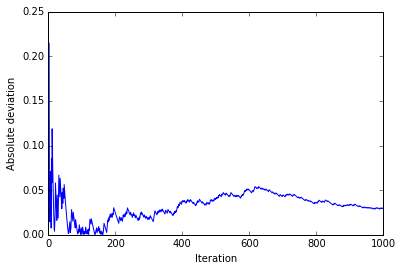

In [70]:
pyplot.plot(err)
pyplot.xlabel('Iteration')
pyplot.ylabel('Absolute deviation')